<a href="https://colab.research.google.com/github/tobbyyan-barker/machinelearning111/blob/main/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E4%BA%8C%E5%88%86%E7%B1%BB%E5%AE%9E%E6%88%98_%E5%9F%BA%E4%BA%8E%E4%B9%B3%E8%85%BA%E7%99%8C%E6%95%B0%E6%8D%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(569, 31)
100/2000, trained,
200/2000, trained,
300/2000, trained,
400/2000, trained,
500/2000, trained,
600/2000, trained,
700/2000, trained,
800/2000, trained,
900/2000, trained,
1000/2000, trained,
1100/2000, trained,
1200/2000, trained,
1300/2000, trained,
1400/2000, trained,
1500/2000, trained,
1600/2000, trained,
1700/2000, trained,
1800/2000, trained,
1900/2000, trained,
2000/2000, trained,
loss is 0.0613,b is 0.5605


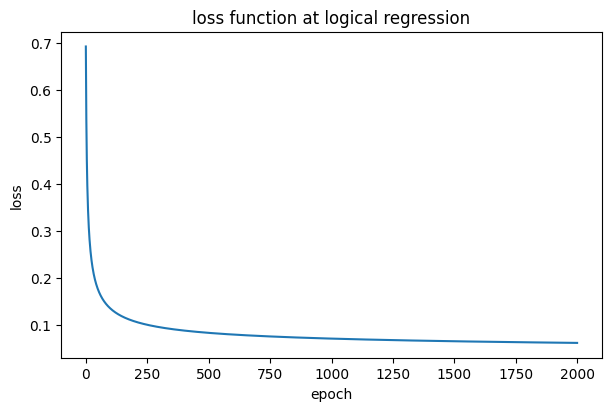

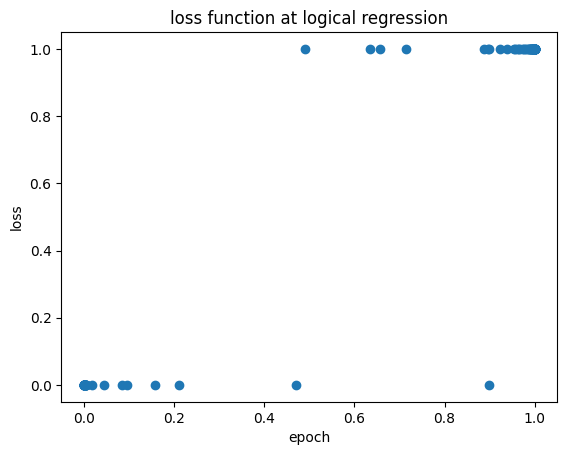

accurancy of this model is:0.9825,recall of this model is:0.9859

precision of this model is:0.9859,specificity of this model is:0.9767



In [6]:
#逻辑回归模型的实战演练 --- 数据: sklearn的乳腺癌数据库
#导入库
from sklearn.datasets import load_breast_cancer #存储在sklearn_ dataset里面涉及bunch结构-- 特殊的字典 里面包含有data,feature_name,target的特征
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # 用于数据标准化的库
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#导入数据和处理数据 --- 来源: sklearn
data = load_breast_cancer()
X,feature_name = data.data,data.feature_names
df = pd.DataFrame(X,columns=feature_name)
df["target"] = data.target
# pd.set_option('display.max_columns', None)#作用: 让pandas 显示所有的列不省略任何一列
print(df.shape)
X,y = data.data,data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

# 数据标准化 (非常重要)
# 梯度下降对特征的尺度很敏感，运用sklearn库里标准化可以加快损失函数收敛并提高性能
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train1=y_train.reshape(-1,1)
n = len(y_train1) #获取样本数量 计算损失函数会用到

#定义参数
w = np.zeros((30,1))
b = 0

#定义超参数
learning_rate = 0.05 #学习率 -- 重中之重
epoches = 2000
previous_loss = float("inf")
tolerance = 1e-6
thershould = 0.5

#定义一个存储列表: 存储loss的值 便于画图
loss_list = []

#定义一个新的列表: 存储预测后和阈值比较的值
actual_list =[]

#开始训练之路
for epoch in range(epoches):
  y_pred = 1/(1+np.exp(-(X_train @ w+b)))
  # 核心步骤 2: 计算损失 (交叉熵损失) ---
  # 为了数值稳定性，防止log(0)的情况，我们对y_pred进行裁剪
  epsilon = 1e-8 # 定义一个极小值
  y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon) #裁剪--- 限制y_pred数值只能落在(0,1)之间
  loss = -(1/n)* np.sum(y_train1 * np.log(y_pred_clipped) + (1-y_train1) * np.log(1-y_pred_clipped))
  loss_list.append(loss)
  dw = (1/n) * (np.transpose(X_train) @ (y_pred - y_train1))
  db = (1/n) * np.sum(y_pred - y_train1)
  w = w - learning_rate * dw
  b = b - learning_rate * db
  if(abs(previous_loss - loss) < tolerance):
    print(f"loss is {loss:.6f}")
    break
  previous_loss = loss
  if((epoch+1)%100 == 0):
    print(f"{epoch+1}/{epoches}, trained,")
print(f"loss is {loss:.4f},b is {b:.4f}")

#开始画损失函数图像:
plt.figure(figsize=(6,4), layout='constrained')
plt.plot(range(len(loss_list)),loss_list)
plt.title("loss function at logical regression")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#开始预测之路
y_test_pred = 1 / (1+np.exp(-(X_test @ w + b)))
y_flat = y_test_pred.flatten()
plt.scatter(y_flat, y_test)
plt.title("loss function at logical regression")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#写三个函数求出三个指标:
#先把预测值映射到 0和1 两个二值区间
for num in y_flat:
  if num >= 0.5:
    num = 1
    actual_list.append(num)
  else:
    num = 0
    actual_list.append(num)


#一个函数求出四个指标:
def calculate_three_indicators(list1,list2):
  count1 = 0
  count2 = 0
  count3 = 0
  count4 = 0
  i = 0
  while i < len(list2):
    if(list1[i]==0 and list2[i]==0):
      count1 = count1 + 1
    elif(list1[i]==1 and list2[i]==1):
      count2 = count2 + 1
    elif(list1[i]==0 and list2[i]==1):
      count3 = count3 + 1
    else:
      count4 = count4 + 1
    i = i + 1

  accurancy = (count1 + count2) / (count1 + count2 + count3 + count4) if(count1 + count2 + count3 + count4 >0) else 0
  recall = count2 / (count2 + count3) if(count2 + count3 >0) else 0
  precision = count2 / (count2 + count4) if(count2 + count4 >0) else 0
  specificity = count1 / (count1 + count4) if(count1 + count4 >0) else 0
  print(f"accurancy of this model is:{accurancy:.4f},recall of this model is:{recall:.4f}\n")
  print(f"precision of this model is:{precision:.4f},specificity of this model is:{specificity:.4f}\n")

#第二种计算求四个指标的方法:
def calculate_four_indicators(actual_list,y_test):
  TP = np.sum((y_test==1) & (actual_list==1))
  TN = np.sum((y_test==0) & (actual_list==0))
  FP = np.sum((y_test==0) & (actual_list==1))
  FN = np.sum((y_test==1) & (actual_list==0))

  accurancy = (TP+TN)/(TP+TN+FP+FN) if(TP+TN+FP+FN>0) else 0
  recall = TP/(TP+FN) if(TP+FN>0) else 0
  precision = TP / (TP + FP) if (TP + FP) > 0 else 0
  specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
  print(f"accurancy of this model is:{accurancy:.4f},recall of this model is:{recall:.4f}\n")
  print(f"precision of this model is:{precision:.4f},specificity of this model is:{specificity:.4f}\n")


#调用函数: 计算四个指标
calculate_three_indicators(actual_list,y_test)

#写完成了
